# 蚁群算法 Ant Colony Algorithm

xyfJASON

## 1 概述

蚁群算法模拟蚁群寻找食物的过程中发现路径的行为。蚂蚁在路径上释放信息素，同时又根据信息素含量作决策。随着时间的推进，较短路径上信息素积累得更快，选择该路径的蚂蚁也越来越多，最终所有蚂蚁基本都集中在最优路径上。

**本文仅用蚁群算法求解 TSP 。**

设共有 $m$ 只蚂蚁，定义 $t$ 时刻，某蚂蚁从 $i$ 地转移到 $j$ 地的概率为：
$$
P_{ij}(t)=\begin{cases}
\dfrac{[\tau_{ij}(t)]^\alpha[\eta_{ij}]^\beta}{\sum\limits_{s\in a_i}[\tau_{is}(t)]^\alpha[\eta_{is}]^\beta}&j\in a_i\\
0&\text{otherwise}
\end{cases}
$$
其中，$a_i$ 是 $i$ 能到达的点的集合，$\tau_{ij}(t)$ 表示 $t$ 时刻 $(i,j)$ 边上的信息素浓度，$\eta_{ij}$ 表示 $(i,j)$ 边的启发式因子，可设为 $\dfrac{1}{d_{ij}}$，$\alpha,\beta$ 是参数，分别表示信息素重要度因子和启发因子的重要度。

定义信息素更新方式为：
$$
\tau_{ij}(t+1)=(1-\rho)\tau_{ij}(t)+\sum_{k=1}^m\Delta\tau_{ij}^{k}(t)
$$
其中 $\rho\in[0, 1]$ 为信息素的挥发系数，$\Delta\tau_{ij}^k(t)$ 为 $t$ 时刻第 $k$ 只蚂蚁向边 $(i,j)$ 释放的信息素浓度，可定义为：
$$
\Delta\tau_{ij}^k(t)=\begin{cases}\dfrac{Q}{L_k}&\text{第 }k\text{ 只蚂蚁走了 }(i,j)\text{ 边}\\0&\text{otherwise}\end{cases}
$$
其中 $Q$ 为系数，$L_k$ 为第 $k$ 只蚂蚁走的路程总长度。

## 2 代码模板

见同文件夹下的 `modopt.py` 模块

## 3 旅行商问题 (TSP)

http://www.math.uwaterloo.ca/tsp/vlsi/index.html

读入数据文件:

In [1]:
import numpy as np

with open('data/tsp_data.txt') as f:
    data = [list(map(int, line.strip().split())) for line in f.readlines()]
    data = np.array(data)
n = 131

定义距离矩阵和启发因子矩阵：

In [2]:
dis_mat = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        dis_mat[i, j] = np.sqrt(np.sum((data[i, 1:] - data[j, 1:]) ** 2))
eta_mat = 1.0 / (dis_mat + np.diag([1e10] * n))

dis_mat, eta_mat

(array([[  0.        ,  13.        ,  14.        , ...,  87.64131446,
          84.29116205, 107.91200119],
        [ 13.        ,   0.        ,   1.        , ...,  84.85281374,
          86.34813258, 107.0046728 ],
        [ 14.        ,   1.        ,   0.        , ...,  84.71717653,
          86.58521814, 107.        ],
        ...,
        [ 87.64131446,  84.85281374,  84.71717653, ...,   0.        ,
          32.        ,  25.49509757],
        [ 84.29116205,  86.34813258,  86.58521814, ...,  32.        ,
           0.        ,  31.144823  ],
        [107.91200119, 107.0046728 , 107.        , ...,  25.49509757,
          31.144823  ,   0.        ]]),
 array([[1.00000000e-10, 7.69230769e-02, 7.14285714e-02, ...,
         1.14101438e-02, 1.18636400e-02, 9.26680989e-03],
        [7.69230769e-02, 1.00000000e-10, 1.00000000e+00, ...,
         1.17851130e-02, 1.15810264e-02, 9.34538627e-03],
        [7.14285714e-02, 1.00000000e+00, 1.00000000e-10, ...,
         1.18039817e-02, 1.15493155

利用蚁群算法求解，设 $50$ 只蚂蚁，迭代 $150$ 次，系数取值 $\alpha=1,\beta=5,\rho=0.1,Q=1$：

In [3]:
from modopt import AntColonyAlgorithm_TSP

solver = AntColonyAlgorithm_TSP(n_cities=n,
                                n_ants=50,
                                T=150,
                                dis=dis_mat,
                                eta=eta_mat,
                                alpha=1,
                                beta=5,
                                rho=0.1,
                                Q=1)
best_dist, best_route = solver.run()
best_dist, best_route

100%|██████████████████████████| 150/150 [00:41<00:00,  3.61it/s, best dist=621]


(621.0587029182169,
 array([ 74,  67,  63,  53,  54,  46,  47,  48,  49,  50,  51,  55,  56,
         57,  62,  66,  70,  75,  69,  65,  64,  61,  68,  78,  82,  83,
         84,  85,  79,  71,  72,  58,  59,  60,  43,  42,  41,  40,  39,
         38,  37,  36,  35,  34,  33,  32,  31,  30,  29,  28,  27,  26,
         25,  18,  16,  15,  14,  13,  11,   5,   0,   6,   7,   1,   2,
          8,   9,   3,  10,  23,  22,  21,  20,  19,  24,  17,  12,   4,
         52,  44,  45,  73,  88,  92,  97,  99, 100, 101, 105, 106, 112,
        107, 108, 114, 118, 115, 119, 116, 121, 128, 127, 126, 125, 124,
        123, 120, 117, 113, 104, 111, 122, 129, 130, 109, 110, 102, 103,
         96,  95,  94,  89,  90,  87,  91,  93,  98,  86,  81,  80,  77,
         76]))

可以查看信息素矩阵、图中最大的若干信息素的值等：

In [4]:
solver.tau, -np.sort(-solver.tau.flatten())[:10]

(array([[1.36891479e-07, 3.47646750e-07, 8.95238065e-07, ...,
         1.38144478e-07, 1.37062930e-07, 4.16163222e-06],
        [1.73897899e-07, 1.36891479e-07, 6.80571758e-01, ...,
         1.43898706e-07, 1.36891479e-07, 7.71940763e-07],
        [1.76101460e-07, 1.59361937e-02, 1.36891479e-07, ...,
         1.36891479e-07, 1.86739545e-07, 5.87591996e-04],
        ...,
        [1.36891479e-07, 1.36891479e-07, 1.36891479e-07, ...,
         1.36891479e-07, 1.41344018e-07, 3.84566038e-03],
        [1.37065831e-07, 1.36891479e-07, 1.36891479e-07, ...,
         1.37210701e-03, 1.36891479e-07, 5.17108046e-02],
        [7.43480229e-04, 2.75155440e-04, 2.58901057e-03, ...,
         5.08913414e-03, 2.10055221e-02, 1.36891479e-07]]),
 array([0.69273802, 0.68426886, 0.68240496, 0.68190597, 0.68164353,
        0.68106463, 0.68057176, 0.67689503, 0.67661368, 0.6759896 ]))

绘制出路线图：

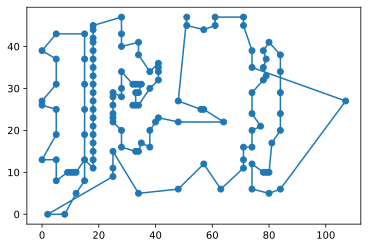

In [5]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

def plot_route(route) -> None:
    fig, ax = plt.subplots(1, 1)
    ax.scatter(data[:, 1], data[:, 2])
    ax.plot(np.hstack((data[route, 1], data[route, 1])),
            np.hstack((data[route, 2], data[route, 2])))

plot_route(best_route)
plt.show()